In [2]:
#Importing python libraries 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mp
#Loading csv file into pandas dataframe
SuicideData= pd.read_csv('master.csv')
SuicideData.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
print(SuicideData.shape)
print(SuicideData.columns)

(27820, 12)
Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


In [4]:
print(SuicideData.sex.value_counts())

male      13910
female    13910
Name: sex, dtype: int64


In [5]:
print(SuicideData.age.value_counts())

35-54 years    4642
25-34 years    4642
15-24 years    4642
75+ years      4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64


In [6]:
print(SuicideData.year.value_counts())

2009    1068
2001    1056
2010    1056
2007    1032
2011    1032
2002    1032
2003    1032
2000    1032
2006    1020
2008    1020
2005    1008
2004    1008
1999     996
2012     972
2013     960
1998     948
2014     936
1995     936
1996     924
1997     924
1994     816
1992     780
1993     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
2016     160
Name: year, dtype: int64


In [262]:
SuicideData['suicides/100k pop'].mean()

12.816097411933894

In [140]:
SuicideData['gdp_per_capita ($)'].describe()

count     27820.000000
mean      16866.464414
std       18887.576472
min         251.000000
25%        3447.000000
50%        9372.000000
75%       24874.000000
max      126352.000000
Name: gdp_per_capita ($), dtype: float64

In [265]:
#DIVIDING BY GENDER
M=SuicideData[SuicideData.sex=='male']
F=SuicideData[SuicideData.sex=='female']


print('TOTAL MALE POPULATION = ',M.population.sum())
print('TOTAL MALE SUICIDES = ',M.suicides_no.sum())
print('AVERAGE MALE SUICIDES per 100k Population = ',M['suicides/100k pop'].mean())
print('TOTAL FEMALE POPULATION = ',F.population.sum())
print('TOTAL FEMALE SUICIDES = ',F.suicides_no.sum())
print('AVERAGE FEMALE SUICIDES per 100k Population = ',F['suicides/100k pop'].mean())

print('\nAVERAGE SUICIDE RATES BY AGE GROUP')
print(SuicideData.groupby(['age'])['suicides/100k pop'].mean())


print('\nAVERAGE SUICIDE RATES OF MALES BY AGE GROUP')
print(M.groupby(['age'])['suicides/100k pop'].mean())

print('\nAVERAGE SUICIDE RATES OF FEMALES BY AGE GROUP')
print(F.groupby(['age'])['suicides/100k pop'].mean())

print("\nSUICIDE RATE RATIO of FEMALE:MALE = 1 :",(M['suicides/100k pop'].mean()) / (F['suicides/100k pop'].mean()))

#print(M.groupby(['age'])['suicides_no'].sum())
#print(F.groupby(['age'])['suicides_no'].sum())



TOTAL MALE POPULATION =  25049376579
TOTAL MALE SUICIDES =  5188910
AVERAGE MALE SUICIDES per 100k Population =  20.239328540618263
TOTAL FEMALE POPULATION =  26272781857
TOTAL FEMALE SUICIDES =  1559510
AVERAGE FEMALE SUICIDES per 100k Population =  5.3928662832494885

AVERAGE SUICIDE RATES BY AGE GROUP
age
15-24 years     8.947154
25-34 years    12.186885
35-54 years    14.947441
5-14 years      0.620041
55-74 years    16.155579
75+ years      23.955409
Name: suicides/100k pop, dtype: float64

AVERAGE SUICIDE RATES OF MALES BY AGE GROUP
age
15-24 years    13.566290
25-34 years    19.800560
35-54 years    23.978402
5-14 years      0.777831
55-74 years    25.187712
75+ years      37.991017
Name: suicides/100k pop, dtype: float64

AVERAGE SUICIDE RATES OF FEMALES BY AGE GROUP
age
15-24 years    4.328018
25-34 years    4.573210
35-54 years    5.916480
5-14 years     0.462252
55-74 years    7.123447
75+ years      9.919802
Name: suicides/100k pop, dtype: float64

SUICIDE RATE RATIO of FEM

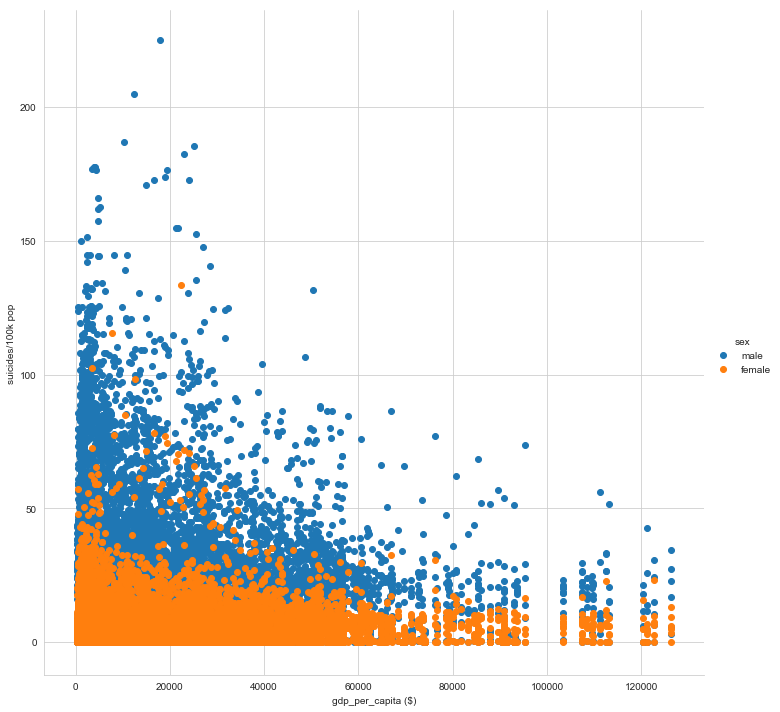

In [8]:
sb.set_style("whitegrid");
sb.FacetGrid(SuicideData, hue="sex", height=10) \
   .map(mp.scatter, "gdp_per_capita ($)", "suicides/100k pop") \
   .add_legend();
mp.show();


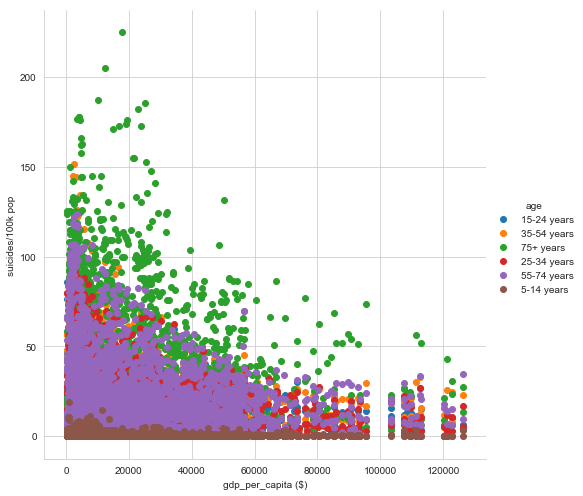

In [266]:
sb.set_style("whitegrid");
sb.FacetGrid(SuicideData, hue="age", height=7) \
   .map(mp.scatter, "gdp_per_capita ($)", "suicides/100k pop") \
   .add_legend();
mp.show();

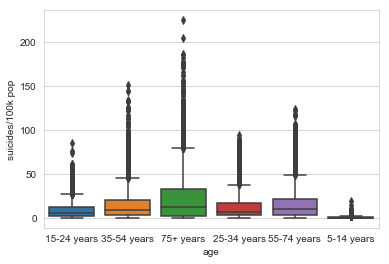

In [10]:
sb.boxplot(x='age',y='suicides/100k pop', data=SuicideData)
mp.show()

C:\Users\Sourav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


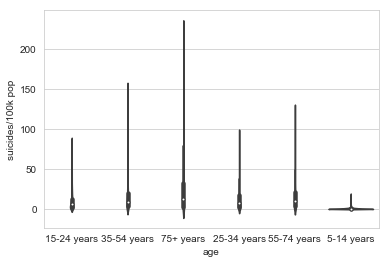

In [11]:
sb.violinplot(x='age',y='suicides/100k pop', data=SuicideData)
mp.show()

- MALES HAVE A GREATER SUICIDE RATE
- SUICIDES DECREASE WITH INCREASE IN GDP. Most visible in age group 25-74
- 75+ YEARS HAVE HIGHEST SUICIDE RATE
- 5-14 HAS THE LOWEST
- AGE IS AN IMPORTANT FACTOR

In [12]:
suicide_mean_by_country=pd.DataFrame(SuicideData.groupby(['country'])['suicides/100k pop'].mean())
suicide_mean_by_country = suicide_mean_by_country.sort_values(by='suicides/100k pop', ascending=False)
suicide_mean_by_country

,suicides/100k pop
country,
Lithuania,40.415573
Sri Lanka,35.295152
Russian Federation,34.892377
Hungary,32.761516
Belarus,31.075913
Kazakhstan,30.511282
Latvia,29.259325
Slovenia,27.827857
Estonia,27.276905


In [253]:
suicide_mean_by_country_M=pd.DataFrame(M.groupby(['country'])['suicides/100k pop'].mean())
suicide_mean_by_country_M = suicide_mean_by_country_M.sort_values(by='suicides/100k pop', ascending=False)
suicide_mean_by_country_M

,suicides/100k pop
country,
Lithuania,67.956947
Russian Federation,58.183704
Sri Lanka,55.091667
Belarus,52.757619
Hungary,51.419355
Kazakhstan,50.014038
Latvia,48.775873
Slovenia,45.174206
Estonia,45.056984


In [254]:
suicide_mean_by_country_F=pd.DataFrame(F.groupby(['country'])['suicides/100k pop'].mean())
suicide_mean_by_country_F = suicide_mean_by_country_F.sort_values(by='suicides/100k pop', ascending=False)
suicide_mean_by_country_F

,suicides/100k pop
country,
Sri Lanka,15.498636
Republic of Korea,14.812527
Hungary,14.103677
Japan,13.692688
Lithuania,12.874198
Macau,12.796667
Singapore,12.669355
Russian Federation,11.601049
Kazakhstan,11.008526


In [13]:
suicide_median_by_country=pd.DataFrame(SuicideData.groupby(['country'])['suicides/100k pop'].quantile(0.5))
suicide_median_by_country = suicide_median_by_country.sort_values(by='suicides/100k pop', ascending=False)
suicide_median_by_country

,suicides/100k pop
country,
Sri Lanka,22.990
Lithuania,22.910
Russian Federation,19.125
Latvia,18.160
Hungary,17.785
Slovenia,17.470
Estonia,17.085
Japan,16.820
Kazakhstan,16.035


In [14]:
gdp_by_country=pd.DataFrame(SuicideData.groupby(['country'])['gdp_per_capita ($)'].mean())
gdp_by_country = gdp_by_country.sort_values(by='gdp_per_capita ($)', ascending=True)
gdp_by_country

,gdp_per_capita ($)
country,
Kyrgyzstan,720.730769
Kiribati,875.909091
Sri Lanka,904.272727
Uzbekistan,976.181818
Azerbaijan,1005.125000
Dominica,1485.000000
Philippines,1540.200000
Guyana,1674.920000
Albania,1859.045455


In [15]:
lithuania=SuicideData[SuicideData.country=='Lithuania']
lithuania

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
15044,Lithuania,1995,male,35-54 years,632,436306,144.85,Lithuania1995,0.701,"7,870,782,261",2324,Boomers
15045,Lithuania,1995,male,75+ years,67,47214,141.91,Lithuania1995,0.701,"7,870,782,261",2324,G.I. Generation
15046,Lithuania,1995,male,55-74 years,325,274196,118.53,Lithuania1995,0.701,"7,870,782,261",2324,Silent
15047,Lithuania,1995,male,25-34 years,226,284758,79.37,Lithuania1995,0.701,"7,870,782,261",2324,Generation X
15048,Lithuania,1995,male,15-24 years,134,263792,50.80,Lithuania1995,0.701,"7,870,782,261",2324,Generation X
15049,Lithuania,1995,female,75+ years,37,109609,33.76,Lithuania1995,0.701,"7,870,782,261",2324,G.I. Generation
15050,Lithuania,1995,female,55-74 years,101,408926,24.70,Lithuania1995,0.701,"7,870,782,261",2324,Silent
15051,Lithuania,1995,female,35-54 years,113,481445,23.47,Lithuania1995,0.701,"7,870,782,261",2324,Boomers
15052,Lithuania,1995,female,25-34 years,33,276055,11.95,Lithuania1995,0.701,"7,870,782,261",2324,Generation X
15053,Lithuania,1995,female,15-24 years,20,256623,7.79,Lithuania1995,0.701,"7,870,782,261",2324,Generation X


In [16]:
print(lithuania.groupby(['age'])['suicides/100k pop'].mean())

age
15-24 years    25.617500
25-34 years    39.680909
35-54 years    61.289773
5-14 years      1.255952
55-74 years    56.728182
75+ years      56.141136
Name: suicides/100k pop, dtype: float64


In [17]:
srilanka=SuicideData[SuicideData.country=='Sri Lanka']
srilanka

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
23900,Sri Lanka,1985,male,75+ years,144,115000,125.22,Sri Lanka1985,0.597,"5,978,460,972",431,G.I. Generation
23901,Sri Lanka,1985,male,15-24 years,1432,1673000,85.59,Sri Lanka1985,0.597,"5,978,460,972",431,Generation X
23902,Sri Lanka,1985,male,25-34 years,1024,1288000,79.50,Sri Lanka1985,0.597,"5,978,460,972",431,Boomers
23903,Sri Lanka,1985,male,55-74 years,443,680000,65.15,Sri Lanka1985,0.597,"5,978,460,972",431,G.I. Generation
23904,Sri Lanka,1985,female,15-24 years,943,1652000,57.08,Sri Lanka1985,0.597,"5,978,460,972",431,Generation X
23905,Sri Lanka,1985,male,35-54 years,824,1469000,56.09,Sri Lanka1985,0.597,"5,978,460,972",431,Silent
23906,Sri Lanka,1985,female,25-34 years,426,1268000,33.60,Sri Lanka1985,0.597,"5,978,460,972",431,Boomers
23907,Sri Lanka,1985,female,75+ years,23,106000,21.70,Sri Lanka1985,0.597,"5,978,460,972",431,G.I. Generation
23908,Sri Lanka,1985,female,35-54 years,203,1402000,14.48,Sri Lanka1985,0.597,"5,978,460,972",431,Silent
23909,Sri Lanka,1985,female,55-74 years,80,600000,13.33,Sri Lanka1985,0.597,"5,978,460,972",431,G.I. Generation


In [60]:
sample_lithuania=lithuania.sample(100)
sample_lithuania

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
15154,Lithuania,2004,male,25-34 years,193,227897,84.69,Lithuania2004,NaN,"22,649,930,576",7028,Generation X
15124,Lithuania,2001,female,25-34 years,19,247712,7.67,Lithuania2001,NaN,"12,252,498,921",3719,Generation X
15289,Lithuania,2015,female,75+ years,38,191358,19.86,Lithuania2015,NaN,"41,508,609,233",15073,Silent
15142,Lithuania,2003,male,75+ years,53,57169,92.71,Lithuania2003,NaN,"18,802,576,988",5778,Silent
15053,Lithuania,1995,female,15-24 years,20,256623,7.79,Lithuania1995,0.701,"7,870,782,261",2324,Generation X
15063,Lithuania,1996,female,35-54 years,129,484132,26.65,Lithuania1996,NaN,"8,385,109,020",2484,Boomers
15265,Lithuania,2013,female,75+ years,40,186711,21.42,Lithuania2013,0.837,"46,417,340,375",16538,Silent
15287,Lithuania,2015,male,25-34 years,101,190800,52.94,Lithuania2015,NaN,"41,508,609,233",15073,Millenials
15189,Lithuania,2007,male,75+ years,51,67551,75.50,Lithuania2007,NaN,"39,738,180,077",12869,Silent
15184,Lithuania,2006,female,25-34 years,19,217069,8.75,Lithuania2006,NaN,"30,216,060,233",9667,Generation X


In [61]:
S1=np.array(sample_lithuania['suicides/100k pop'])
print(S1)
median1=np.median(S1)
print('MEDIAN1=',median1)

[ 84.69   7.67  19.86  92.71   7.79  26.65  21.42  52.94  75.5    8.75
  22.77  40.82  71.71   4.38  30.48  96.98   0.41  76.32  81.18  34.94
  19.74   2.96  70.62  25.55 117.37  67.61  74.6   24.49   9.96  12.57
  44.71   6.88  71.01  11.56  11.87  22.24  13.14  75.66   4.22   1.07
  19.39  23.47  12.06  18.47  77.95  84.53  16.96  51.88  28.72  45.27
 102.44 123.17  88.45   2.71  33.76  14.22   7.18  77.77   0.    14.55
   0.     8.57   0.47   5.59  11.95  31.06   2.28 115.34  79.37   6.06
   0.65   0.72  83.3   21.17   2.13  83.89   1.43  84.84   0.53  88.29
 103.28   0.74  17.95 144.85  15.27  70.29  14.33  82.95  78.9   27.33
 106.39   8.98   0.95  25.11   2.51  28.89   2.25  15.03  10.09  20.54]
MEDIAN1= 21.83


In [59]:
sample_srilanka=srilanka.sample(100)
sample_srilanka

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
24031,Sri Lanka,2006,female,5-14 years,11,1606015,0.68,Sri Lanka2006,NaN,"28,267,410,543",1580,Millenials
23980,Sri Lanka,2000,female,35-54 years,309,2394085,12.91,Sri Lanka2000,0.679,"16,330,814,180",953,Boomers
24021,Sri Lanka,2006,male,55-74 years,649,1187973,54.63,Sri Lanka2006,NaN,"28,267,410,543",1580,Silent
23993,Sri Lanka,2001,female,55-74 years,100,1109859,9.01,Sri Lanka2001,NaN,"15,749,753,805",912,Silent
23953,Sri Lanka,1998,female,15-24 years,522,1753245,29.77,Sri Lanka1998,NaN,"15,794,972,847",935,Generation X
23926,Sri Lanka,1996,male,25-34 years,918,1524411,60.22,Sri Lanka1996,NaN,"13,897,738,375",834,Generation X
23914,Sri Lanka,1986,male,15-24 years,1304,1702300,76.60,Sri Lanka1986,NaN,"6,405,210,564",454,Generation X
23913,Sri Lanka,1986,male,25-34 years,1045,1310300,79.75,Sri Lanka1986,NaN,"6,405,210,564",454,Boomers
23996,Sri Lanka,2002,male,75+ years,165,211446,78.03,Sri Lanka2002,NaN,"16,536,535,647",951,Silent
24006,Sri Lanka,2002,female,5-14 years,28,1626383,1.72,Sri Lanka2002,NaN,"16,536,535,647",951,Millenials


In [62]:
S2=np.array(sample_srilanka['suicides/100k pop'])
print(S2)
median2=np.median(S2)
print('MEDIAN2=',median2)

[  0.68  12.91  54.63   9.01  29.77  60.22  76.6   79.75  78.03   1.72
  10.01  28.96  37.17  13.33  20.18  22.15  65.46  19.26  65.23  51.36
  60.72  71.53  51.92 125.22  30.33  57.08  11.72  91.81   3.04  47.85
  11.66  61.46   8.23  10.67  73.21  13.02  20.54  72.97   3.87  41.28
  11.77   2.     0.91  42.37  76.18  14.06  23.47  21.7   12.17   3.11
  79.5   35.84  24.92  61.77 101.59  70.51  20.11  57.78   1.06  85.59
   2.57  68.97  11.99  18.9   66.75  87.74  19.6   67.29 108.22  33.6
   2.01  56.91   1.99   1.42   2.82  43.23  15.5    2.25   7.61   8.67
  70.49  15.29  22.51  70.44  14.2    0.66  18.44  50.54  13.54  11.68
  18.96  28.29   1.43  69.75  43.67   1.63  13.92  26.33  33.88   1.47]
MEDIAN2= 22.990000000000002


In [240]:
TS=median1-median2
print("Test Statistic is (Median of Lithuania - Median of Sri Lanka)=", TS)

Test Statistic is (Median of Lithuania - Median of Sri Lanka)= -1.1600000000000037


In [64]:
S= np.concatenate((S1,S2), axis=None)
np.random.shuffle(S)
print(S)

[ 35.84  14.2    1.63  47.85  14.55   0.68  13.92  91.81 123.17   2.28
  43.67   2.     1.99  33.6   22.15   7.61  24.92   5.59  28.89  28.29
 144.85 115.34   9.01 108.22   1.42   2.51  61.77  22.24   2.13  17.95
  84.53  12.17  13.33   3.87  24.49  40.82  79.5   76.6   70.51  12.91
 125.22  12.06  76.18  34.94  21.17  11.95   0.47  10.01   4.22  71.01
   0.95   1.06  11.77   0.72  56.91  20.11  82.95  13.14  20.54   6.88
  18.44  13.54  69.75  84.84  13.02  19.26  51.36  21.7   11.68   7.79
  29.77  11.72  18.96  18.9    0.74  25.11  65.23  15.27   0.53  92.71
  85.59  73.21   2.25  28.72   8.23  15.03 101.59  18.47  74.6    2.71
  71.71  71.53  78.9   75.66  87.74  67.61  26.65  51.88   0.    37.17
   0.    20.18   2.25  10.67 106.39  79.75  51.92  11.56  67.29  77.77
  19.74   9.96  19.86  42.37  14.33  66.75  96.98  23.47  33.76  21.42
   8.57  68.97  77.95  76.32  70.62  20.54  22.77  15.5   11.87  11.66
  10.09  57.08 103.28   4.38   7.18   8.98   1.72 117.37  65.46  19.39
  14.0

In [102]:
#Randomly sample 100-100 data points and calculate the difference of medians
medianlist=np.zeros(1000)
for i in range(1000):
    _s1= np.random.choice(S,100)
    _s2= np.setdiff1d(S, _s1)
    _median1= np.median(_s1)
    _median2= np.median(_s2)
    medianlist[i]= np.array(_median1 - _median2)


In [241]:
medianlist=np.sort(medianlist)

#calculation of p-value
ct=0
for i in medianlist:
    if i < TS:
        ct+=1
pvalue= (1000-ct) / 1000

medianlist=pd.DataFrame(medianlist, columns=['mediandiff'])
pv95=medianlist.mediandiff[949]
print('VALUE in 95th Percentile position=', pv95)
print('TEST STATISTIC =',TS)
print('P-VALUE OF TS =', pvalue)
if pvalue>0.05:
    print('OBSERVATION VALUE IS LOWER THAN THE 95th Percentile.\nTHUS probability of OCCURENCE OF OUR OBSERVATION GIVEN NULL HYPOTHESIS IS High, AS P-VALUE OF {} IS HIGHER THAN THE SIGNIFICANCE LEVEL OF 0.05'.format(pvalue))
    print('SO WE ACCEPT THE NULL HYPOTHESIS AS TRUE : LITHUANIA AND SRI LANKA HAVE NO SIGNIFICANT DIFFERENCE IN SUICIDE RATES')
else:
    print('OBSERVATION VALUE IS HIGHER THAN THE 95th Percentile.\nTHUS probability of OCCURENCE OF OUR OBSERVATION GIVEN NULL HYPOTHESIS IS Extremely Low, AS P-VALUE OF {} IS LOWER THAN THE SIGNIFICANCE LEVEL OF 0.05'.format(pvalue))
    print('SO WE REJECT THE NULL HYPOTHESIS AND ACCEPT THE ALTERNATE HYPOTHESIS : LITHUANIA AND SRI LANKA HAVE A SIGNIFICANT DIFFERENCE IN SUICIDE RATES')
    if TS > 0:
        print('FROM THE SIGN OF TS WE KNOW LITHUANIA HAS A HIGHER SUICIDE RATE')
    else:
        print('FROM THE SIGN OF TS WE KNOW SRI LANKA HAS A HIGHER SUICIDE RATE')

VALUE in 95th Percentile position= 9.535000000000004
TEST STATISTIC = -1.1600000000000037
P-VALUE OF TS = 0.511
OBSERVATION VALUE IS LOWER THAN THE 95th Percentile.
THUS probability of OCCURENCE OF OUR OBSERVATION GIVEN NULL HYPOTHESIS IS High, AS P-VALUE OF 0.511 IS HIGHER THAN THE SIGNIFICANCE LEVEL OF 0.05
SO WE ACCEPT THE NULL HYPOTHESIS AS TRUE : LITHUANIA AND SRI LANKA HAVE NO SIGNIFICANT DIFFERENCE IN SUICIDE RATES


# LITHUANIA VS JAPAN

In [68]:
japan=SuicideData[SuicideData.country=='Japan']
japan

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
13364,Japan,1985,male,75+ years,1340,1791000,74.82,Japan1985,0.791,"1,398,892,744,821",12401,G.I. Generation
13365,Japan,1985,female,75+ years,1553,2862400,54.26,Japan1985,0.791,"1,398,892,744,821",12401,G.I. Generation
13366,Japan,1985,male,55-74 years,3763,8996900,41.83,Japan1985,0.791,"1,398,892,744,821",12401,G.I. Generation
13367,Japan,1985,male,35-54 years,6962,17833300,39.04,Japan1985,0.791,"1,398,892,744,821",12401,Silent
13368,Japan,1985,male,25-34 years,1982,8465800,23.41,Japan1985,0.791,"1,398,892,744,821",12401,Boomers
13369,Japan,1985,female,55-74 years,2543,11024900,23.07,Japan1985,0.791,"1,398,892,744,821",12401,G.I. Generation
13370,Japan,1985,female,35-54 years,2582,17953700,14.38,Japan1985,0.791,"1,398,892,744,821",12401,Silent
13371,Japan,1985,male,15-24 years,1139,8728500,13.05,Japan1985,0.791,"1,398,892,744,821",12401,Generation X
13372,Japan,1985,female,25-34 years,817,8321600,9.82,Japan1985,0.791,"1,398,892,744,821",12401,Boomers
13373,Japan,1985,female,15-24 years,491,8366600,5.87,Japan1985,0.791,"1,398,892,744,821",12401,Generation X


In [70]:
print(japan.groupby(['age'])['suicides/100k pop'].median())

age
15-24 years     9.760
25-34 years    16.660
35-54 years    20.885
5-14 years      0.455
55-74 years    28.805
75+ years      42.885
Name: suicides/100k pop, dtype: float64


In [247]:
sample_japan=japan.sample(100)
sample_japan

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
13612,Japan,2005,female,35-54 years,2114,16388567,12.90,Japan2005,0.874,"4,755,410,630,912",39412,Boomers
13628,Japan,2007,male,55-74 years,8184,16130000,50.74,Japan2007,NaN,"4,515,264,514,431",37408,Silent
13427,Japan,1990,male,35-54 years,4822,18296000,26.36,Japan1990,0.814,"3,132,817,652,848",26949,Silent
13369,Japan,1985,female,55-74 years,2543,11024900,23.07,Japan1985,0.791,"1,398,892,744,821",12401,G.I. Generation
13392,Japan,1987,female,55-74 years,2938,11656000,25.21,Japan1987,NaN,"2,532,808,573,157",22137,G.I. Generation
13467,Japan,1993,male,15-24 years,974,9691000,10.05,Japan1993,NaN,"4,454,143,876,947",37832,Generation X
13434,Japan,1990,male,5-14 years,30,8168200,0.37,Japan1990,0.814,"3,132,817,652,848",26949,Generation X
13677,Japan,2011,male,35-54 years,6975,17224000,40.50,Japan2011,0.886,"6,157,459,594,824",50919,Generation X
13514,Japan,1997,female,35-54 years,2045,17605000,11.62,Japan1997,NaN,"4,414,732,843,544",37080,Boomers
13416,Japan,1989,female,55-74 years,2786,12244000,22.75,Japan1989,NaN,"3,054,914,166,263",26389,G.I. Generation


In [248]:
S3=np.array(sample_japan['suicides/100k pop'])
print(S3)
median3=np.median(S3)
print('MEDIAN3=',median3)

[12.9  50.74 26.36 23.07 25.21 10.05  0.37 40.5  11.62 22.75  7.44  0.96
 15.33 41.8  11.97 30.31 41.14 17.87 35.4   0.68 20.22  0.38 36.47 19.95
 50.8   0.19 14.14 17.65 18.18 13.64  0.32 17.9  47.75  4.38 10.36  0.28
 13.2   0.63 31.99 17.52 13.1  31.85  0.64 37.03 34.1   0.29 12.37 10.36
 11.91  9.82 33.27  5.51 30.54  0.35 36.71  7.84  0.63 11.95 16.92 25.09
 12.5  39.28  0.57  9.27 28.08 12.35 31.13  8.43  1.02 16.59 14.74  9.31
 17.68 20.79 62.94 11.18  0.37  7.54 11.62 11.92 14.33  5.47 35.33  7.
 12.72 13.64 15.12  0.44 46.48  0.69 14.38 25.98 15.79 33.97 54.68 13.36
  9.69 45.74  0.5  59.92]
MEDIAN3= 13.89


In [249]:
TS2=median1-median3
print("Test Statistic is (Median of Lithuania - Median of Japan)=", TS2)

Test Statistic is (Median of Lithuania - Median of Japan)= 7.939999999999998


In [250]:
SS= np.concatenate((S1,S3), axis=None)
np.random.shuffle(SS)
print(SS)

[  0.28  25.55  25.09   0.69  10.05   7.18   2.28   8.57  30.54  33.27
  14.22   0.5   19.39  23.07   0.95   9.27  16.59  25.98  11.62  31.85
  34.1    0.     0.32 117.37  35.4   27.33  12.72  13.1   28.72   6.06
  25.11  14.38  14.74  22.24  88.29  83.89  21.42  13.14   0.63   0.41
  18.18  14.33   0.44   5.51   5.47  17.65   7.84  45.27  12.37  92.71
   4.22  71.01   4.38   0.47   8.98   4.38  13.64  17.9   71.71  15.27
  17.87  11.95  33.76  44.71  88.45   7.    21.17   0.37  31.13  17.95
  84.69  14.33  26.36  12.9  115.34  67.61  15.03   0.64   8.75  28.89
  31.06   0.38   2.96   9.69 123.17   0.63  52.94   0.65  82.95  11.91
  25.21  96.98  39.28  19.74  83.3   12.06  81.18  50.74   2.13  17.52
 106.39   0.68  30.31  14.55  11.97  75.66  54.68  70.29   7.67  22.75
  37.03  84.53   9.31   0.74  13.64  84.84   0.35  13.36  36.47  12.5
  15.79   0.72  20.22  16.96 102.44   1.02  46.48   0.96  11.62  11.87
  14.14  20.54   9.96  34.94  59.92   7.54   0.53  10.36   5.59  11.56
  70.62

In [251]:
#Randomly sample 100-100 data points and calculate the difference of medians
medianlist2=np.zeros(1000)
for i in range(1000):
    _s1= np.random.choice(SS,100)
    _s3= np.setdiff1d(SS, _s1)
    #print(_s1)
    #print(_s3)
    _median1= np.median(_s1)
    _median3= np.median(_s3)
    medianlist2[i]= np.array(_median1 - _median3)


In [252]:
medianlist2=np.sort(medianlist2)

#calculation of p-value
ct2=0
for i in medianlist2:
    if i < TS2:
        ct2+=1
pvalue2= (1000-ct2) / 1000

medianlist2=pd.DataFrame(medianlist2, columns=['mediandiff'])
pv95_2=medianlist2.mediandiff[949]
print('VALUE in 95th Percentile position=', pv95_2)
print('TEST STATISTIC =',TS2)
print('P-VALUE OF TS =', pvalue2)
if pvalue2>0.05:
    print('OBSERVATION VALUE IS LOWER THAN THE 95th Percentile.\nTHUS probability of OCCURENCE OF OUR OBSERVATION GIVEN NULL HYPOTHESIS IS High, AS P-VALUE OF {} IS HIGHER THAN THE SIGNIFICANCE LEVEL OF 0.05'.format(pvalue2))
    print('SO WE ACCEPT THE NULL HYPOTHESIS AS TRUE : LITHUANIA AND JAPAN HAVE NO SIGNIFICANT DIFFERENCE IN SUICIDE RATES')
else:
    print('OBSERVATION VALUE IS HIGHER THAN THE 95th Percentile.\nTHUS probability of OCCURENCE OF OUR OBSERVATION GIVEN NULL HYPOTHESIS IS Extremely Low, AS P-VALUE OF {} IS LOWER THAN THE SIGNIFICANCE LEVEL OF 0.05'.format(pvalue2))
    print('SO WE REJECT THE NULL HYPOTHESIS AND ACCEPT THE ALTERNATE HYPOTHESIS : LITHUANIA AND JAPAN HAVE A SIGNIFICANT DIFFERENCE IN SUICIDE RATES')
    if TS2 > 0:
        print('FROM THE SIGN OF TS WE KNOW LITHUANIA HAS A HIGHER SUICIDE RATE')
    else:
        print('FROM THE SIGN OF TS WE KNOW JAPAN HAS A HIGHER SUICIDE RATE')
    

VALUE in 95th Percentile position= 4.605
TEST STATISTIC = 7.939999999999998
P-VALUE OF TS = 0.013
OBSERVATION VALUE IS HIGHER THAN THE 95th Percentile.
THUS probability of OCCURENCE OF OUR OBSERVATION GIVEN NULL HYPOTHESIS IS Extremely Low, AS P-VALUE OF 0.013 IS LOWER THAN THE SIGNIFICANCE LEVEL OF 0.05
SO WE REJECT THE NULL HYPOTHESIS AND ACCEPT THE ALTERNATE HYPOTHESIS : LITHUANIA AND JAPAN HAVE A SIGNIFICANT DIFFERENCE IN SUICIDE RATES
FROM THE SIGN OF TS WE KNOW LITHUANIA HAS A HIGHER SUICIDE RATE


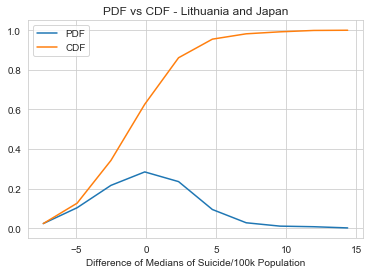

In [139]:
count, bins = np.histogram(medianlist2.mediandiff, bins=10, density = True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
mp.plot(bins[1:],pdf, label='PDF')
mp.plot(bins[1:],cdf, label='CDF')
mp.title('PDF vs CDF - Lithuania and Japan')
mp.xlabel('Difference of Medians of Suicide/100k Population')
mp.legend()
mp.show()

In [ ]:
gdp_suicide = pd.merge(suicide_by_country, gdp_by_country, on='country')
gdp_suicide

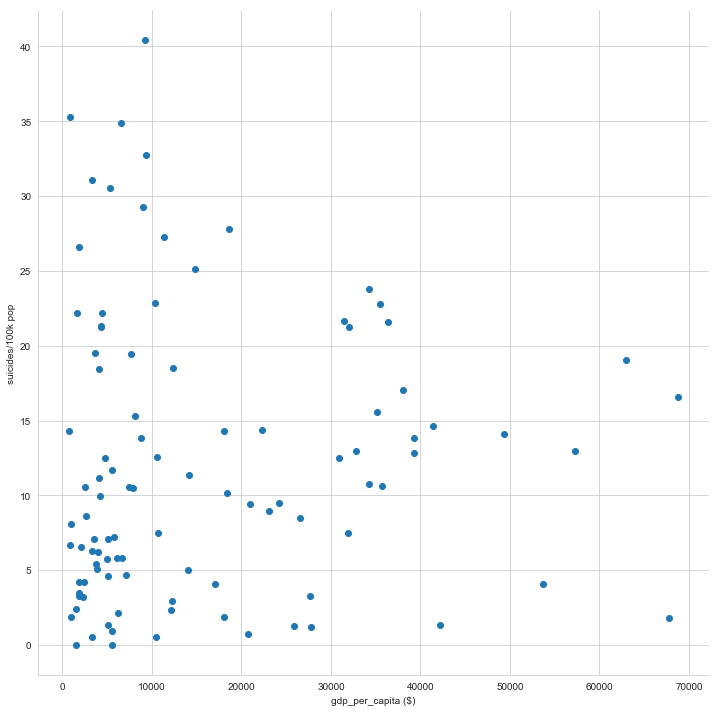

In [89]:
sb.set_style("whitegrid");
sb.FacetGrid(gdp_suicide, height=10) \
   .map(mp.scatter, "gdp_per_capita ($)", "suicides/100k pop") \
   .add_legend();
mp.show();

In [95]:
rate_by_year=pd.DataFrame(SuicideData.groupby(['year'])['suicides/100k pop'].mean())
rate_by_year = rate_by_year.sort_values(by='year', ascending=True)
rate_by_year

,suicides/100k pop
year,
1985,11.826198
1986,11.423333
1987,11.644213
1988,12.709405
1989,12.879071
1990,12.862956
1991,13.438880
1992,13.498564
1993,13.833705


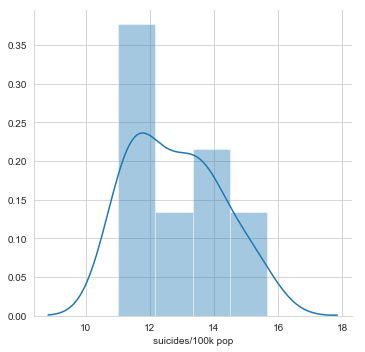

In [102]:
sb.FacetGrid(rate_by_year, height=5) \
   .map(sb.distplot, "suicides/100k pop") \
   .add_legend();
mp.show();

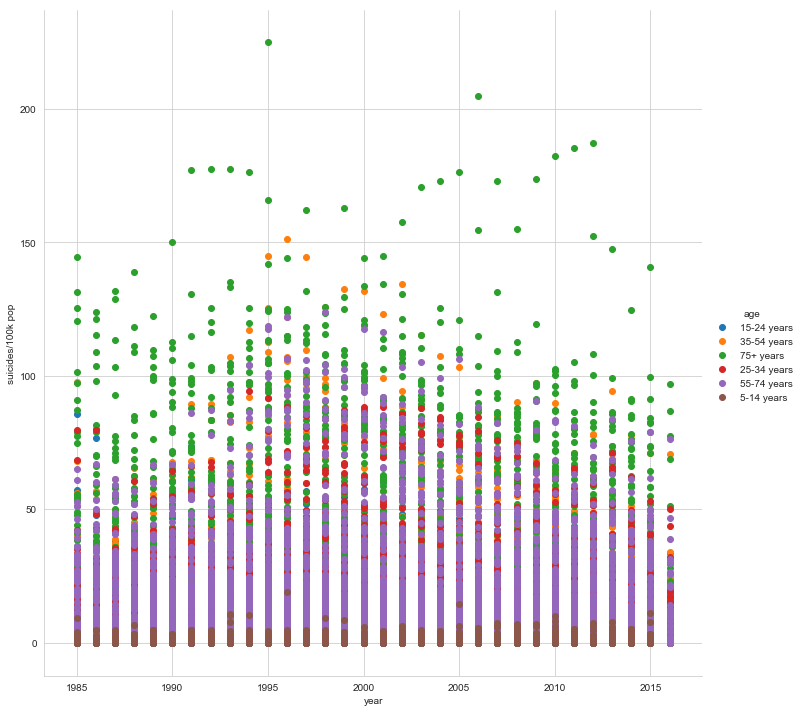

In [103]:
sb.set_style("whitegrid");
sb.FacetGrid(SuicideData, hue="age", height=10) \
   .map(mp.scatter, "year", "suicides/100k pop") \
   .add_legend();
mp.show();

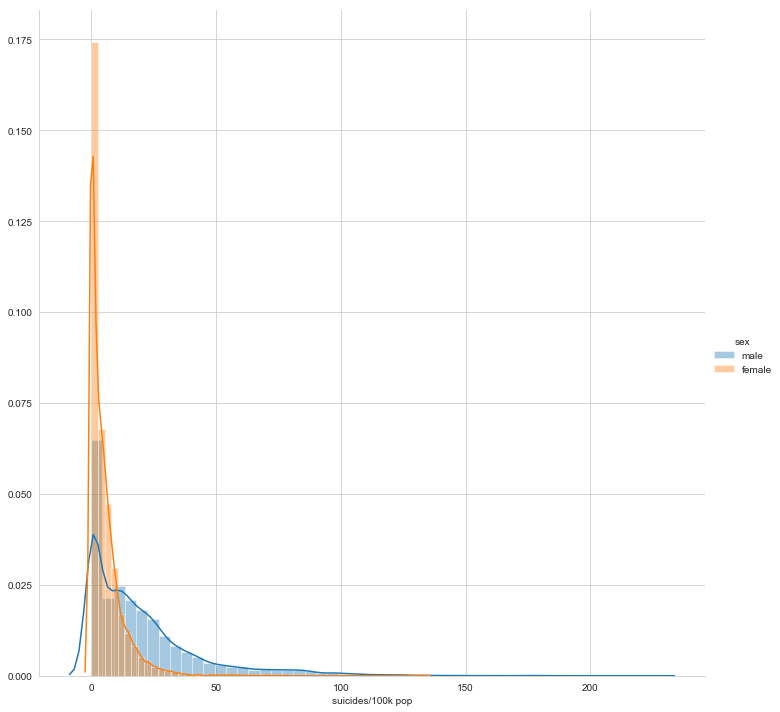

In [105]:
sb.FacetGrid(SuicideData, hue='sex', height=10)\
.map(sb.distplot, 'suicides/100k pop').add_legend()
mp.show()

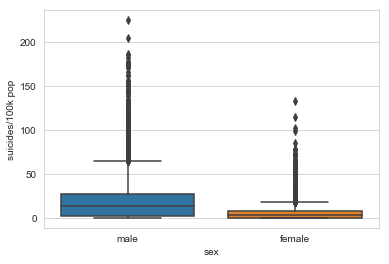

In [106]:
sb.boxplot(x='sex',y='suicides/100k pop', data=SuicideData)
mp.show()

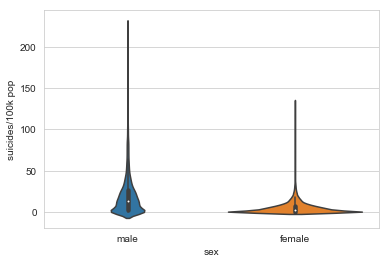

In [107]:
sb.violinplot(x='sex',y='suicides/100k pop', data=SuicideData)
mp.show()

In [113]:
print(SuicideData.country.value_counts())

Iceland                   382
Austria                   382
Mauritius                 382
Netherlands               382
Italy                     372
Luxembourg                372
Republic of Korea         372
Ecuador                   372
Malta                     372
Belgium                   372
United States             372
Colombia                  372
Spain                     372
Argentina                 372
Brazil                    372
Chile                     372
Mexico                    372
Greece                    372
Japan                     372
Singapore                 372
Israel                    372
United Kingdom            372
Puerto Rico               372
Norway                    360
Australia                 360
France                    360
Bulgaria                  360
Ireland                   360
Guatemala                 360
Costa Rica                360
                         ... 
Slovenia                  252
Estonia                   252
Belarus   

# RELATION OF SUICIDE RATE WITH GDP

In [141]:
SuicideData['gdp_per_capita ($)'].describe()

count     27820.000000
mean      16866.464414
std       18887.576472
min         251.000000
25%        3447.000000
50%        9372.000000
75%       24874.000000
max      126352.000000
Name: gdp_per_capita ($), dtype: float64

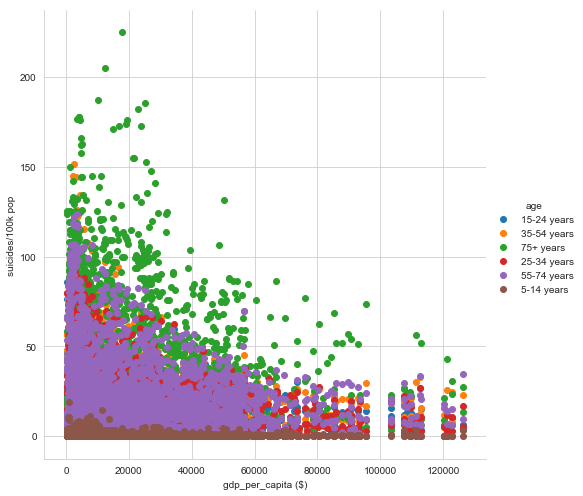

In [279]:
sb.set_style("whitegrid");
sb.FacetGrid(SuicideData, hue="age", height=7) \
   .map(mp.scatter, "gdp_per_capita ($)", "suicides/100k pop") \
   .add_legend();
mp.show();

In [195]:
gdp_grouping=pd.DataFrame(data=(SuicideData.groupby(['gdp_per_capita ($)'])['suicides/100k pop'].sum()))
gdp_grouping

,suicides/100k pop
gdp_per_capita ($),
251,18.00
291,191.44
313,182.63
345,193.30
357,51.05
359,173.11
385,40.86
387,66.73
398,184.94


In [183]:
print(gdp_grouping.shape)

(2233, 1)


In [199]:
low_mid_gdp = gdp_grouping.loc[:40000]
high_gdp = gdp_grouping.loc[40000:]



In [200]:
low_mid_gdp.describe()


,suicides/100k pop
count,1959.000000
mean,160.867943
std,129.341691
min,0.000000
25%,63.480000
50%,131.070000
75%,233.460000
max,855.300000


In [201]:
high_gdp.describe()

,suicides/100k pop
count,274.000000
mean,151.107774
std,62.798340
min,8.230000
25%,125.647500
50%,146.790000
75%,198.725000
max,307.600000


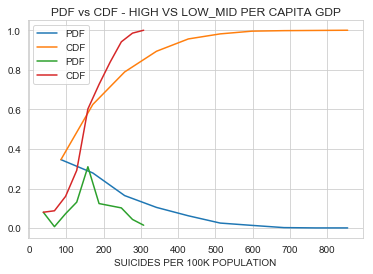

In [205]:
count, bins = np.histogram(low_mid_gdp['suicides/100k pop'], bins=10, density = True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
mp.plot(bins[1:],pdf, label='PDF')
mp.plot(bins[1:],cdf, label='CDF')

count, bins = np.histogram(high_gdp['suicides/100k pop'], bins=10, density = True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
mp.plot(bins[1:],pdf, label='PDF')
mp.plot(bins[1:],cdf, label='CDF')

mp.title('PDF vs CDF - HIGH VS LOW_MID PER CAPITA GDP')
mp.xlabel('SUICIDES PER 100K POPULATION')
mp.legend()
mp.show()

In [210]:
l_gdp=SuicideData[SuicideData['gdp_per_capita ($)'] < 40000]
h_gdp=SuicideData[SuicideData['gdp_per_capita ($)'] >= 40000]

In [211]:
l_gdp.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,24530.000000,24530.00000,2.453000e+04,24530.000000,6816.000000,24530.000000
mean,2000.294333,223.45267,1.720947e+06,12.847138,0.749718,11388.062291
std,8.375972,856.84548,3.478167e+06,19.544508,0.081258,10358.300540
min,1985.000000,0.00000,2.780000e+02,0.000000,0.483000,251.000000
25%,1994.000000,2.00000,9.340275e+04,0.840000,0.694000,3045.000000
50%,2000.000000,23.00000,4.134365e+05,5.585000,0.754500,7423.000000
75%,2007.000000,124.00000,1.446504e+06,16.170000,0.817000,17681.000000
max,2016.000000,22338.00000,4.188145e+07,224.970000,0.905000,39960.000000


In [212]:
h_gdp.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,3290.000000,3290.000000,3.290000e+03,3290.000000,1548.000000,3290.000000
mean,2008.446201,385.144681,2.768187e+06,12.584660,0.894969,57713.031003
std,4.982822,1176.361913,6.183624e+06,13.862394,0.028877,18011.100532
min,1992.000000,0.000000,7.210000e+02,0.000000,0.805000,40018.000000
25%,2006.000000,5.000000,2.365375e+05,2.547500,0.884000,45563.000000
50%,2009.000000,45.000000,5.427795e+05,8.225000,0.901000,51749.000000
75%,2012.000000,183.000000,1.922945e+06,19.142500,0.912000,61863.000000
max,2016.000000,11767.000000,4.380521e+07,131.580000,0.944000,126352.000000


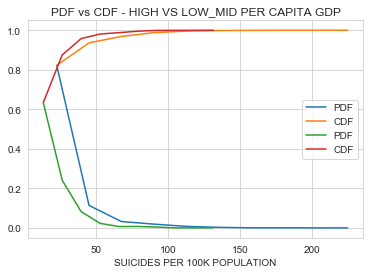

In [213]:
count, bins = np.histogram(l_gdp['suicides/100k pop'], bins=10, density = True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
mp.plot(bins[1:],pdf, label='PDF')
mp.plot(bins[1:],cdf, label='CDF')

count, bins = np.histogram(h_gdp['suicides/100k pop'], bins=10, density = True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
mp.plot(bins[1:],pdf, label='PDF')
mp.plot(bins[1:],cdf, label='CDF')

mp.title('PDF vs CDF - HIGH VS LOW_MID PER CAPITA GDP')
mp.xlabel('SUICIDES PER 100K POPULATION')
mp.legend()
mp.show()

In [214]:
#Spearman's rank correlation coefficient
#IF THERE IS A CORRELATION BETWEEN GDP PER CAPITA & SUICIDE RATES
#ON THE WHOLE DATASET
import scipy.stats as sp

sp.spearmanr(SuicideData['gdp_per_capita ($)'],SuicideData['suicides/100k pop'] )

SpearmanrResult(correlation=0.07306331576449537, pvalue=3.02415181882464e-34)

In [216]:
#Spearman's rank correlation coefficient
#IF THERE IS A CORRELATION BETWEEN GDP PER CAPITA & SUICIDE RATES
#LOW GDP

sp.spearmanr(l_gdp['gdp_per_capita ($)'],l_gdp['suicides/100k pop'] )

SpearmanrResult(correlation=0.04909104794165794, pvalue=1.4382145317534633e-14)

In [217]:
#Spearman's rank correlation coefficient
#IF THERE IS A CORRELATION BETWEEN GDP PER CAPITA & SUICIDE RATES
#HIGH GDP

sp.spearmanr(h_gdp['gdp_per_capita ($)'],h_gdp['suicides/100k pop'] )

SpearmanrResult(correlation=-0.05302119315849893, pvalue=0.0023485463901397456)

In [219]:
#Spearman's rank correlation coefficient
#IF THERE IS A CORRELATION BETWEEN GDP PER CAPITA & SUICIDE RATES
#FOR MALES

sp.spearmanr(M['gdp_per_capita ($)'],M['suicides/100k pop'] )

SpearmanrResult(correlation=0.0756620258993069, pvalue=4.0483679662177365e-19)

In [220]:
#Spearman's rank correlation coefficient
#IF THERE IS A CORRELATION BETWEEN GDP PER CAPITA & SUICIDE RATES
#FOR MALES

sp.spearmanr(F['gdp_per_capita ($)'],F['suicides/100k pop'] )

SpearmanrResult(correlation=0.10438254861299948, pvalue=5.276251630468429e-35)

In [267]:
#DIVIDING BY AGE GROUP

A5_14=SuicideData[SuicideData.age=='5-14 years']
A15_24=SuicideData[SuicideData.age=='15-24 years']
A25_34=SuicideData[SuicideData.age=='25-34 years']
A35_54=SuicideData[SuicideData.age=='35-54 years']
A55_74=SuicideData[SuicideData.age=='55-74 years']
A75P=SuicideData[SuicideData.age=='75+ years']

#MALES
AM5_14=M[M.age=='5-14 years']
AM15_24=M[M.age=='15-24 years']
AM25_34=M[M.age=='25-34 years']
AM35_54=M[M.age=='35-54 years']
AM55_74=M[M.age=='55-74 years']
AM75P=M[M.age=='75+ years']

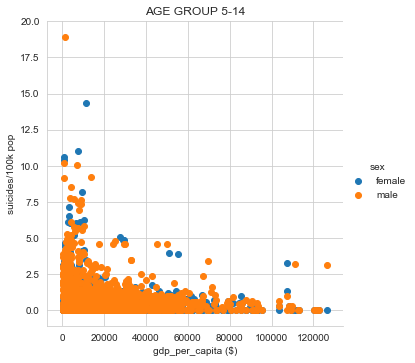

In [285]:
sb.set_style("whitegrid");
sb.FacetGrid(A5_14, hue='sex', height=5) \
   .map(mp.scatter, "gdp_per_capita ($)", "suicides/100k pop") \
   .add_legend();
mp.title('AGE GROUP 5-14')
mp.show();

In [225]:
#Spearman's rank correlation coefficient
#IF THERE IS A CORRELATION BETWEEN GDP PER CAPITA & SUICIDE RATES
#FOR 5-14 years 

sp.spearmanr(A5_14['gdp_per_capita ($)'],A5_14['suicides/100k pop'] )

SpearmanrResult(correlation=-0.16081774476923122, pvalue=4.381154187347501e-28)

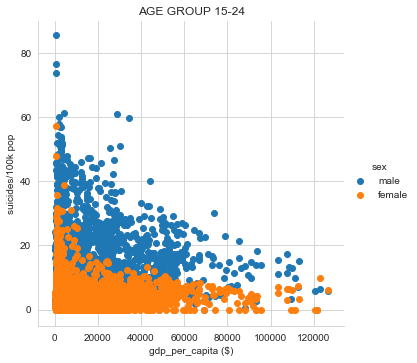

In [286]:
sb.set_style("whitegrid");
sb.FacetGrid(A15_24, hue='sex', height=5) \
   .map(mp.scatter, "gdp_per_capita ($)", "suicides/100k pop") \
   .add_legend();
mp.title('AGE GROUP 15-24')
mp.show();

In [226]:
#Spearman's rank correlation coefficient
#IF THERE IS A CORRELATION BETWEEN GDP PER CAPITA & SUICIDE RATES
#FOR 15-24 years 

sp.spearmanr(A15_24['gdp_per_capita ($)'],A15_24['suicides/100k pop'] )

SpearmanrResult(correlation=-0.007046659223596717, pvalue=0.6312407417699475)

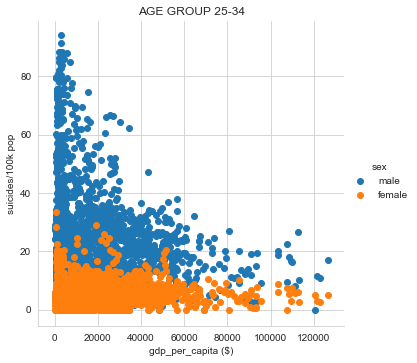

In [287]:
sb.set_style("whitegrid");
sb.FacetGrid(A25_34, hue='sex', height=5) \
   .map(mp.scatter, "gdp_per_capita ($)", "suicides/100k pop") \
   .add_legend();
mp.title('AGE GROUP 25-34')
mp.show();

In [227]:
#Spearman's rank correlation coefficient
#IF THERE IS A CORRELATION BETWEEN GDP PER CAPITA & SUICIDE RATES
#FOR 25-34 years 

sp.spearmanr(A25_34['gdp_per_capita ($)'],A25_34['suicides/100k pop'] )

SpearmanrResult(correlation=0.0936469315164842, pvalue=1.6297404505901945e-10)

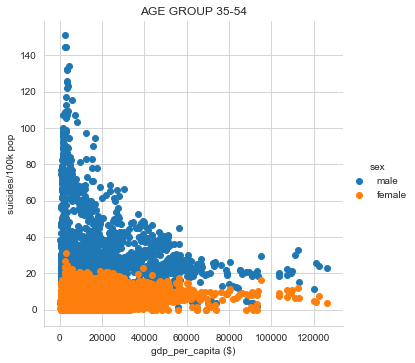

In [288]:
sb.set_style("whitegrid");
sb.FacetGrid(A35_54, hue='sex', height=5) \
   .map(mp.scatter, "gdp_per_capita ($)", "suicides/100k pop") \
   .add_legend();
mp.title('AGE GROUP 35-54')
mp.show();

In [228]:
#Spearman's rank correlation coefficient
#IF THERE IS A CORRELATION BETWEEN GDP PER CAPITA & SUICIDE RATES
#FOR 35-54 years 

sp.spearmanr(A35_54['gdp_per_capita ($)'],A35_54['suicides/100k pop'] )

SpearmanrResult(correlation=0.1690685598668204, pvalue=4.144502810705675e-31)

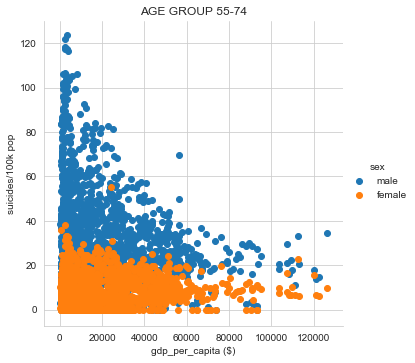

In [289]:
sb.set_style("whitegrid");
sb.FacetGrid(A55_74, hue='sex', height=5) \
   .map(mp.scatter, "gdp_per_capita ($)", "suicides/100k pop") \
   .add_legend();
mp.title('AGE GROUP 55-74')
mp.show();

In [229]:
#Spearman's rank correlation coefficient
#IF THERE IS A CORRELATION BETWEEN GDP PER CAPITA & SUICIDE RATES
#FOR 55-74 years 

sp.spearmanr(A55_74['gdp_per_capita ($)'],A55_74['suicides/100k pop'] )

SpearmanrResult(correlation=0.14078055044073637, pvalue=5.571939552827092e-22)

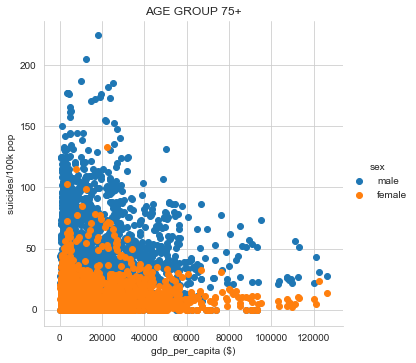

In [290]:
sb.set_style("whitegrid");
sb.FacetGrid(A75P, hue='sex', height=5) \
   .map(mp.scatter, "gdp_per_capita ($)", "suicides/100k pop") \
   .add_legend();
mp.title('AGE GROUP 75+')
mp.show();

In [230]:
#Spearman's rank correlation coefficient
#IF THERE IS A CORRELATION BETWEEN GDP PER CAPITA & SUICIDE RATES
#FOR 75+ years 

sp.spearmanr(A75P['gdp_per_capita ($)'],A75P['suicides/100k pop'] )

SpearmanrResult(correlation=0.10607524884952993, pvalue=4.3038326856836297e-13)

In [268]:
#Spearman's rank correlation coefficient
#IF THERE IS A CORRELATION BETWEEN GDP PER CAPITA & SUICIDE RATES
#FOR 75+ years MALES

sp.spearmanr(AM75P['gdp_per_capita ($)'],AM75P['suicides/100k pop'] )

SpearmanrResult(correlation=0.14216836977187522, pvalue=5.964416841040875e-12)

In [270]:
#Spearman's rank correlation coefficient
#IF THERE IS A CORRELATION BETWEEN GDP PER CAPITA & SUICIDE RATES
#FOR 55-74 years MALES

sp.spearmanr(AM55_74['gdp_per_capita ($)'],AM55_74['suicides/100k pop'] )

SpearmanrResult(correlation=0.10662665465964372, pvalue=2.620977824756333e-07)

# USA


In [255]:
usa=SuicideData[SuicideData.country=='United States']
usa

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X
26853,United States,1985,female,35-54 years,2105,27763000,7.58,United States1985,0.841,"4,346,734,000,000",19693,Silent
26854,United States,1985,female,55-74 years,1568,21366000,7.34,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26855,United States,1985,female,75+ years,466,7469000,6.24,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26856,United States,1985,female,25-34 years,1242,21041000,5.90,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26857,United States,1985,female,15-24 years,854,19589000,4.36,United States1985,0.841,"4,346,734,000,000",19693,Generation X


In [256]:
Musa=usa[usa.sex=='male']
Fusa=usa[usa.sex=='female']

In [257]:
print(Musa.shape)
print(Fusa.shape)

(186, 12)
(186, 12)


In [258]:

print('TOTAL MALE POPULATION = ',Musa.population.sum())
print('TOTAL MALE SUICIDES = ',Musa.suicides_no.sum())
print('AVERAGE MALE SUICIDES per 100k Population = ',Musa['suicides/100k pop'].mean())
print('TOTAL FEMALE POPULATION = ',Fusa.population.sum())
print('TOTAL FEMALE SUICIDES = ',Fusa.suicides_no.sum())
print('AVERAGE FEMALE SUICIDES per 100k Population = ',Fusa['suicides/100k pop'].mean())

print(usa.groupby(['age'])['suicides/100k pop'].mean())



print(Musa.groupby(['age'])['suicides/100k pop'].mean())
print(Fusa.groupby(['age'])['suicides/100k pop'].mean())

print(Musa.groupby(['age'])['suicides_no'].sum())
print(Fusa.groupby(['age'])['suicides_no'].sum())

TOTAL MALE POPULATION =  3940328915
TOTAL MALE SUICIDES =  820216
AVERAGE MALE SUICIDES per 100k Population =  22.963225806451625
TOTAL FEMALE POPULATION =  4113698286
TOTAL FEMALE SUICIDES =  213797
AVERAGE FEMALE SUICIDES per 100k Population =  4.676397849462366
age
15-24 years    11.345968
25-34 years    14.172419
35-54 years    16.040645
5-14 years      0.733387
55-74 years    15.943065
75+ years      24.683387
Name: suicides/100k pop, dtype: float64
age
15-24 years    18.917742
25-34 years    23.042581
35-54 years    24.468387
5-14 years      1.053871
55-74 years    25.706129
75+ years      44.590645
Name: suicides/100k pop, dtype: float64
age
15-24 years    3.774194
25-34 years    5.302258
35-54 years    7.612903
5-14 years     0.412903
55-74 years    6.180000
75+ years      4.776129
Name: suicides/100k pop, dtype: float64
age
15-24 years    118776
25-34 years    148251
35-54 years    289345
5-14 years       6476
55-74 years    176179
75+ years       81189
Name: suicides_no, dtyp